In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

76.43452488930822 117.3044179046795
29.035735780458808 117.95859854037451
23.26520310996152 -140.55800204065162
-27.395165790568107 136.424655562751
-21.690660367300254 6.7609512978471
-0.029689199890128748 -130.79379841470953
-15.067348938392527 -105.93163638320966
16.30521216740921 163.79703521047344
38.17247199750946 -11.896998253866514
85.52623932581216 -135.72883217094636
-13.215311016664444 113.61042735497227
54.092031382321125 -97.30720708112392
64.56408248629054 162.1170998569424
-26.336137390102948 -84.65757721828862
-57.263367306130334 -123.07266534789898
18.982774664511467 24.57982694240539
-52.714033115800035 85.93664465597578
-43.54799319855733 -71.4110504500802
17.124115023828708 -39.54218452143746
-40.44659118360385 60.134312147118806
-10.353913368194895 1.9848071960601885
-55.10334737270026 140.51648244414417
39.14946674175144 4.3987890742640445
-8.279939089657375 106.52028283718874
-15.531780478081487 61.839808596253306
-5.706915182881588 145.16530379576596
-57.5530297

-3.4924197452274512 -11.518742351884754
-10.589568767999879 -35.43094234254622
24.27436447378244 26.577055232449908
11.280881770252478 -97.70612963518471
13.735474675010565 100.86363876565844
78.7253588826922 -176.21247606747667
-31.46982166814533 -170.43429695194655
-17.67240964200184 175.7267077167686
-16.20768718108961 -145.83950744137675
72.69866431701632 -120.63929068066847
55.38330187264978 -34.30952333435988
-75.0188079515538 114.6720964875035
60.043152109086606 -1.819001214112177
-64.6987219440898 52.160785148793536
-68.84075477343328 104.81326546732527
-19.957986218309046 31.75142001476422
-41.25462688263842 -169.8552997825549
-4.842752366949441 117.66247916581307
51.75402591213137 -47.44867499741517
75.76635244175665 13.995161016572325
-11.210770754082574 76.95989828181689
81.95874914647933 -165.51932749236033
29.62152009533399 176.69758897479375
86.68952046642508 -17.26705541707281
-17.690349616504847 -40.885760419972144
34.85943823569281 107.30250823273195
69.69265230016393

54.71406420912484 -141.89514113395074
-9.144920450156306 172.77052081663982
22.738951210128704 -11.529940068770259
44.79041091512016 -134.11253659041304
-4.136304702935476 -163.20317089730685
-45.74740559756207 127.61536056834638
51.032750287475665 87.67436826084207
25.99411183652073 -81.47949967817301
-32.17901732893499 -137.11585503067914
15.479670024649096 165.72453422898008
87.5733388416769 -5.271934693863017
-85.85350469493699 81.40328594657882
19.544951617250405 -37.85452678301937
7.950712395486391 -19.597130401993724
-48.00129045907375 -106.79118334233021
-75.96916273933753 -45.6941154194721
-38.79129973080359 -28.31815016119458
-55.6017434091104 -159.19111547896935
-36.08176248640406 -100.75130286436016
-35.58257451436595 119.91993698970259
5.317385366040284 -174.83119621616075
-64.14987059231049 -129.24843832755278
4.914680527961238 75.62954427021802
43.990443301286746 106.54022543882974
67.0397947500833 25.579848991876617
45.484182038971625 -95.24010757785155
28.4040986557922

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


611

In [7]:
#6.2.6
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call. build basic URL for website and add API key to URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # try-except block 6.2.6
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | shangrao
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | alice springs
Processing Record 5 of Set 1 | henties bay
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | cascais
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | muncar
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | evensk
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kutum
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | new norfolk
Processing Record 23 of Set 1 | mahon
Processing Record 24 of Set 1 | palabuhanratu
City

Processing Record 41 of Set 4 | port hedland
Processing Record 42 of Set 4 | bichena
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | havre-saint-pierre
Processing Record 45 of Set 4 | verkhnyaya sysert
Processing Record 46 of Set 4 | adrar
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | carrickfergus
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | tracy
Processing Record 1 of Set 5 | sudak
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | axim
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | kaitangata
Processing Record 6 of Set 5 | mpulungu
Processing Record 7 of Set 5 | mishan
Processing Record 8 of Set 5 | metro
Processing Record 9 of Set 5 | bahia honda
Processing Record 10 of Set 5 | dzilam gonzalez
Processing Record 11 of Set 5 | alakurtti
Processing Record 12 of Set 5 | flinders
Processing Record 13 of Set 5 | eureka
Processing Record 14 of Set 5 | ovalle
Pro

Processing Record 32 of Set 8 | galesong
Processing Record 33 of Set 8 | bonavista
Processing Record 34 of Set 8 | carlos chagas
Processing Record 35 of Set 8 | guozhen
Processing Record 36 of Set 8 | muswellbrook
Processing Record 37 of Set 8 | dimbokro
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | iruma
Processing Record 40 of Set 8 | huarmey
Processing Record 41 of Set 8 | tsiroanomandidy
Processing Record 42 of Set 8 | kokopo
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | karratha
Processing Record 45 of Set 8 | rocha
Processing Record 46 of Set 8 | bagdarin
Processing Record 47 of Set 8 | shimoda
Processing Record 48 of Set 8 | west bay
Processing Record 49 of Set 8 | keetmanshoop
Processing Record 50 of Set 8 | gigmoto
Processing Record 1 of Set 9 | paracuru
Processing Record 2 of Set 9 | maldonado
Processing Record 3 of Set 9 | eldikan
City not found. Skipping...
Processing Record 4 of Set 9 | rizhao
Processing Record 5 of Set 9 

Processing Record 20 of Set 12 | gallup
Processing Record 21 of Set 12 | marcona
City not found. Skipping...
Processing Record 22 of Set 12 | los llanos de aridane
Processing Record 23 of Set 12 | manta
Processing Record 24 of Set 12 | ravar
Processing Record 25 of Set 12 | miri
Processing Record 26 of Set 12 | xiongzhou
Processing Record 27 of Set 12 | hamilton
Processing Record 28 of Set 12 | nador
Processing Record 29 of Set 12 | umm kaddadah
Processing Record 30 of Set 12 | aklavik
Processing Record 31 of Set 12 | tilichiki
Processing Record 32 of Set 12 | dedovichi
Processing Record 33 of Set 12 | excelsior springs
Processing Record 34 of Set 12 | dongsheng
Processing Record 35 of Set 12 | solnechnyy
Processing Record 36 of Set 12 | bougouni
Processing Record 37 of Set 12 | deqing
Processing Record 38 of Set 12 | college
Processing Record 39 of Set 12 | batagay-alyta
Processing Record 40 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 41 of Set 12 | tawnat


In [12]:
len(city_data)

560

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame. 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,40.19,95,100,13.85,RU,2022-08-31 18:27:35
1,Shangrao,28.4532,117.9686,74.30,95,99,0.25,CN,2022-08-31 18:27:36
2,Hilo,19.7297,-155.0900,79.29,79,40,3.44,US,2022-08-31 18:27:36
3,Alice Springs,-23.7000,133.8833,56.75,82,100,2.30,AU,2022-08-31 18:27:36
4,Henties Bay,-22.1160,14.2845,57.56,89,6,4.83,NA,2022-08-31 18:27:37
5,Atuona,-9.8000,-139.0333,77.32,67,14,24.00,PF,2022-08-31 18:27:37
6,Puerto Ayora,-0.7393,-90.3518,76.96,88,84,11.01,EC,2022-08-31 18:27:37
7,Butaritari,3.0707,172.7902,81.68,78,29,21.88,KI,2022-08-31 18:27:38
8,Cascais,38.6979,-9.4215,75.06,65,20,16.11,PT,2022-08-31 18:25:32
9,Tuktoyaktuk,69.4541,-133.0374,57.20,77,20,9.22,CA,2022-08-31 18:27:38


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-08-31 18:27:35,71.9167,114.0833,40.19,95,100,13.85
1,Shangrao,CN,2022-08-31 18:27:36,28.4532,117.9686,74.30,95,99,0.25
2,Hilo,US,2022-08-31 18:27:36,19.7297,-155.0900,79.29,79,40,3.44
3,Alice Springs,AU,2022-08-31 18:27:36,-23.7000,133.8833,56.75,82,100,2.30
4,Henties Bay,NA,2022-08-31 18:27:37,-22.1160,14.2845,57.56,89,6,4.83
5,Atuona,PF,2022-08-31 18:27:37,-9.8000,-139.0333,77.32,67,14,24.00
6,Puerto Ayora,EC,2022-08-31 18:27:37,-0.7393,-90.3518,76.96,88,84,11.01
7,Butaritari,KI,2022-08-31 18:27:38,3.0707,172.7902,81.68,78,29,21.88
8,Cascais,PT,2022-08-31 18:25:32,38.6979,-9.4215,75.06,65,20,16.11
9,Tuktoyaktuk,CA,2022-08-31 18:27:38,69.4541,-133.0374,57.20,77,20,9.22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
#make scatter plots 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

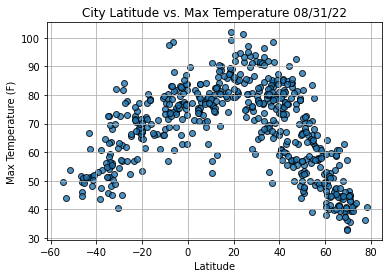

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

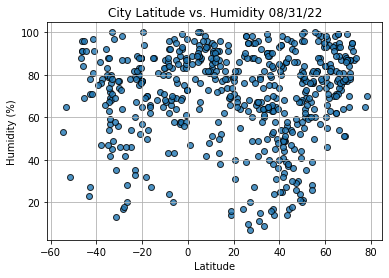

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


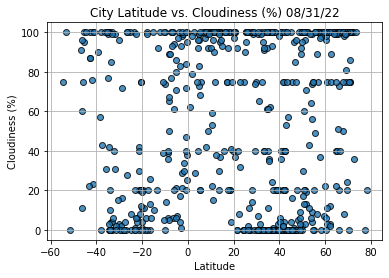

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

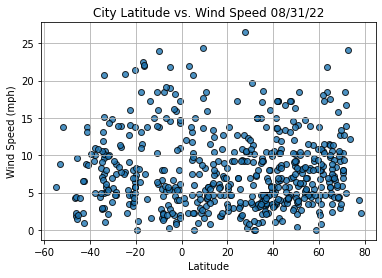

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()